# importing the libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import seaborn as sns
%matplotlib inline

# Downloading the dataset

In [2]:
# Download from kaggle
! kaggle datasets download -d mansoordaku/ckdisease

  0%|                                               | 0.00/9.51k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 9.51k/9.51k [00:00<00:00, 3.14MB/s]


In [3]:
# Unzip the file
! tar -xzvf ckdisease.zip

x kidney_disease.csv


In [4]:
# Remove the zipped file
! rm ckdisease.zip

# Importing the dataset and summary statistics

In [9]:
df= pd.read_csv("./kidney_disease.csv")
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [10]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [13]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Checking missing Values

In [15]:
pd.isna(df).sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# Extracting X as all columns except the first column and Y as first column

In [55]:
data= df.iloc[:, 1:7].values
data

array([[0.8 , 0.83, 0.66, 1.9 , 1.1 , 1.  ],
       [0.9 , 0.36, 0.32, 1.4 , 0.74, 0.99],
       [0.8 , 0.88, 0.7 , 0.8 , 0.18, 0.98],
       [1.  , 0.87, 0.87, 0.7 , 1.05, 0.99],
       [0.9 , 0.75, 0.68, 1.3 , 0.52, 0.98],
       [1.  , 0.65, 0.65, 0.6 , 0.52, 0.98],
       [0.95, 0.97, 0.92, 1.  , 1.23, 0.99],
       [0.95, 0.87, 0.83, 1.9 , 1.35, 1.02],
       [1.  , 0.45, 0.45, 0.8 , 0.32, 1.  ],
       [0.95, 0.36, 0.34, 0.5 , 0.  , 1.04],
       [0.85, 0.39, 0.33, 0.7 , 0.28, 0.99],
       [0.7 , 0.76, 0.53, 1.2 , 0.15, 0.98],
       [0.8 , 0.46, 0.37, 0.4 , 0.38, 1.01],
       [0.2 , 0.39, 0.08, 0.8 , 0.11, 0.99],
       [1.  , 0.9 , 0.9 , 1.1 , 1.04, 0.99],
       [1.  , 0.84, 0.84, 1.9 , 2.06, 1.02],
       [0.65, 0.42, 0.27, 0.5 , 0.11, 1.01],
       [1.  , 0.75, 0.75, 1.  , 1.32, 1.  ],
       [0.5 , 0.44, 0.22, 0.6 , 0.11, 0.99],
       [1.  , 0.63, 0.63, 1.1 , 1.07, 0.99],
       [1.  , 0.33, 0.33, 0.4 , 0.18, 1.01],
       [0.9 , 0.93, 0.84, 0.6 , 1.59, 1.02],
       [1.

In [56]:
target= df.iloc[:,0].values
target

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0], dtype=int64)

In [57]:
df.corr()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
REMISS,1.000000,0.264529,0.199488,0.263997,0.541982,0.361188,-0.143963
CELL,0.264529,1.000000,0.291788,0.607077,0.190235,0.440772,0.134832
SMEAR,0.199488,0.291788,1.000000,0.929701,0.317457,0.612348,-0.120395
INFIL,0.263997,0.607077,0.929701,1.000000,0.321144,0.695768,-0.039825
LI,0.541982,0.190235,0.317457,0.321144,1.000000,0.603877,-0.054002
BLAST,0.361188,0.440772,0.612348,0.695768,0.603877,1.000000,0.216681
TEMP,-0.143963,0.134832,-0.120395,-0.039825,-0.054002,0.216681,1.000000


# Explaratory Data Analysis

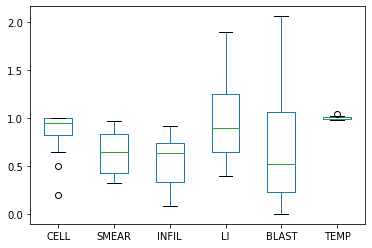

In [58]:
columns= ['CELL','SMEAR','INFIL','LI','BLAST','TEMP']
df[columns].plot(kind='box')
plt.show()

In [59]:
# filter out Remiss 
remiss= df.loc[target == 1]
remiss

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.80,0.83,0.66,1.9,1.10,1.00
1,1,0.90,0.36,0.32,1.4,0.74,0.99
4,1,0.90,0.75,0.68,1.3,0.52,0.98
6,1,0.95,0.97,0.92,1.0,1.23,0.99
15,1,1.00,0.84,0.84,1.9,2.06,1.02
19,1,1.00,0.63,0.63,1.1,1.07,0.99
22,1,1.00,0.58,0.58,1.0,0.53,1.00
24,1,1.00,0.60,0.60,1.7,0.96,0.99
25,1,1.00,0.69,0.69,0.9,0.40,0.99


In [60]:
# filter out not_Remiss 
not_remiss= df.loc[target == 0]
not_remiss

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
2,0,0.80,0.88,0.70,0.8,0.18,0.98
3,0,1.00,0.87,0.87,0.7,1.05,0.99
5,0,1.00,0.65,0.65,0.6,0.52,0.98
7,0,0.95,0.87,0.83,1.9,1.35,1.02
8,0,1.00,0.45,0.45,0.8,0.32,1.00
9,0,0.95,0.36,0.34,0.5,0.00,1.04
10,0,0.85,0.39,0.33,0.7,0.28,0.99
11,0,0.70,0.76,0.53,1.2,0.15,0.98
12,0,0.80,0.46,0.37,0.4,0.38,1.01
13,0,0.20,0.39,0.08,0.8,0.11,0.99


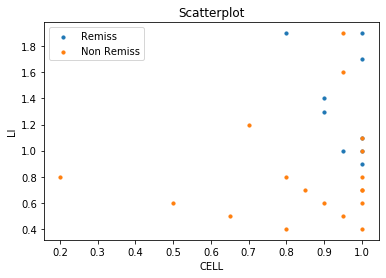

In [61]:
plt.scatter(remiss.iloc[:, 1], remiss.iloc[:, 4], s=10, label= 'Remiss')
plt.scatter(not_remiss.iloc[:, 1], not_remiss.iloc[:, 4], s=10, label= 'Non Remiss')
plt.legend()
plt.title('Scatterplot')
plt.xlabel('CELL')
plt.ylabel('LI')
plt.show()

# 10-fold Cross Validation

In [62]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [63]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test= data[train_index], data[test_index], \
                                        target[train_index], target[test_index]
    print(train_index, test_index)
    

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 17 18 19 20 21 22 23 24 25 26] [12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 18 19 20 21 22 23 24 25 26] [15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 21 22 23 24 25 26] [18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 23 24 25
 26] [21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25
 26] [23 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24] [25 26]


In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), data, target)

C:\Users\pRAsSA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\pRAsSA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pRAsSA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pRAsSA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.66666667, 0.66666667, 0.66666667])

# Split the data into training set and testing set

In [65]:
#determining the predictors/features(X) and response/class label(y)
X= df.iloc[:, [2,4]].values
X

array([[0.83, 1.9 ],
       [0.36, 1.4 ],
       [0.88, 0.8 ],
       [0.87, 0.7 ],
       [0.75, 1.3 ],
       [0.65, 0.6 ],
       [0.97, 1.  ],
       [0.87, 1.9 ],
       [0.45, 0.8 ],
       [0.36, 0.5 ],
       [0.39, 0.7 ],
       [0.76, 1.2 ],
       [0.46, 0.4 ],
       [0.39, 0.8 ],
       [0.9 , 1.1 ],
       [0.84, 1.9 ],
       [0.42, 0.5 ],
       [0.75, 1.  ],
       [0.44, 0.6 ],
       [0.63, 1.1 ],
       [0.33, 0.4 ],
       [0.93, 0.6 ],
       [0.58, 1.  ],
       [0.32, 1.6 ],
       [0.6 , 1.7 ],
       [0.69, 0.9 ],
       [0.73, 0.7 ]])

In [66]:
y= df.iloc[:,0].values
y

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0], dtype=int64)

In [81]:
#Splitting the dataset into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [82]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[-1.27974976e+00, -9.95293011e-01],
       [ 6.93197788e-01, -5.67209996e-01],
       [-9.59812322e-01, -9.95293011e-01],
       [ 1.43971848e+00, -5.67209996e-01],
       [ 2.66614534e-01, -7.81251503e-01],
       [-1.49304139e+00,  1.35916357e+00],
       [ 5.92003188e-16,  1.57320508e+00],
       [ 1.59968720e-01,  2.88956035e-01],
       [-1.11978104e+00, -5.67209996e-01],
       [ 4.79906161e-01, -1.39126980e-01],
       [ 7.99843601e-01,  7.49145277e-02],
       [-7.46520695e-01, -1.20933452e+00],
       [ 1.22642686e+00,  2.00128810e+00],
       [ 1.59968720e+00,  2.88956035e-01],
       [-7.99843601e-01, -3.53168488e-01],
       [ 1.27974976e+00,  2.00128810e+00],
       [-8.53166508e-01, -7.81251503e-01],
       [-1.06645814e-01,  7.49145277e-02],
       [ 8.53166508e-01,  5.02997543e-01],
       [-1.43971848e+00, -1.20933452e+00]])

In [83]:
X_test

array([[0.75, 1.3 ],
       [0.88, 0.8 ],
       [0.97, 1.  ],
       [0.93, 0.6 ],
       [0.36, 1.4 ],
       [0.87, 1.9 ],
       [0.39, 0.8 ]])

In [84]:
y_test

array([1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [85]:
#Fitting Logistics Regression to the Training set
from sklearn.linear_model import LogisticRegression

In [87]:
model= LogisticRegression(random_state=0)

In [88]:
model.fit(X_train,y_train)

C:\Users\pRAsSA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
model.score(X_test,y_test)

0.42857142857142855

In [90]:
y_prediction= model.predict(X_test)
y_prediction

array([1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Coefficients

In [91]:
print(model.coef_)
print(model.intercept_)

[[0.29167661 1.08244942]]
[-0.81674517]


# accuracy and confusion matrix

In [92]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test,y_prediction)
acc_score = accuracy_score(y_test, y_prediction)
parameters= model.coef_
print(cm)
print(acc_score*100)
print(parameters)

[[0 4]
 [0 3]]
42.857142857142854
[[0.29167661 1.08244942]]


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



C:\Users\pRAsSA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision boundary and Test Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


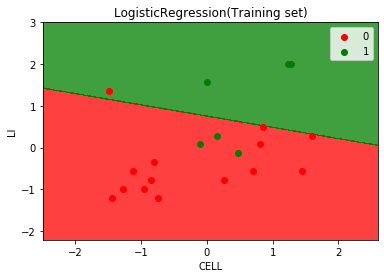

In [94]:
#visualising training set results

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max() + 1, step = 0.01),)
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c= ListedColormap(('red','green'))(i), label = j)
plt.title('LogisticRegression(Training set)')
plt.legend()
plt.xlabel('CELL')
plt.ylabel('LI')
plt.show()                                                 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


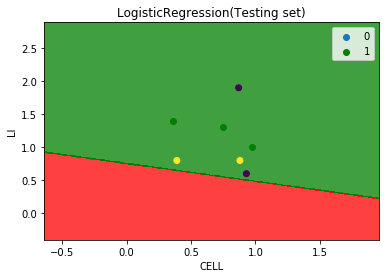

In [95]:
#visualising test set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max() + 1, step = 0.01),)
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c= ListedColormap(('red','green'))(i), label = j)
plt.title('LogisticRegression(Testing set)')
plt.legend()
plt.xlabel('CELL')
plt.ylabel('LI')
plt.show()